In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from BeautifulSoup import BeautifulSoup
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import requests
import time
from sklearn.preprocessing import Imputer
% matplotlib inline

In [133]:
df

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,Previous Day,3-Day Slope,15-Day Slope
1500000,14,1617,-0.029194,-0.036260,NaN,-0.001025,NaN,-0.413126,-0.432231,NaN,...,0.000000e+00,0.000000e+00,0.259124,NaN,0.000000e+00,-2.000000e+00,NaN,0.012073,NaN,NaN
1500001,15,1617,-0.535304,0.443462,NaN,-0.310223,NaN,-0.347921,-0.400324,NaN,...,-1.432547e-41,-3.963489e-35,0.327488,0.076734,-1.298983e-03,-1.999815e+00,-0.016704,-0.028615,NaN,NaN
1500002,16,1617,-0.456318,0.254091,0.158817,-0.249143,-0.038041,0.132843,0.234058,3.599337,...,-0.000000e+00,-4.394844e-15,0.597007,-0.151588,0.000000e+00,-2.000000e+00,0.034125,-0.010275,NaN,NaN
1500003,17,1617,0.122122,0.022712,0.126870,NaN,0.023528,0.117057,NaN,0.039531,...,-1.588718e-17,-1.432267e-41,-0.113227,0.170810,8.870806e-05,-2.000000e+00,0.035902,0.031042,-0.008939,NaN
1500004,18,1617,-0.014850,-0.048239,-0.040318,0.704967,-0.012409,-0.414752,0.293888,-0.064001,...,0.000000e+00,0.000000e+00,-0.079460,NaN,0.000000e+00,0.000000e+00,NaN,-0.032484,-0.002616,NaN
1500005,19,1617,0.056285,0.071675,1.176968,-0.331303,-0.296856,-0.217362,0.202963,2.261409,...,-5.014728e-10,-5.333208e-10,0.206628,0.010703,1.075806e-08,-1.999992e+00,-0.002536,-0.007010,-0.003905,NaN
1500006,20,1617,0.341496,-0.025442,-0.036608,0.092316,0.629230,0.047605,NaN,0.428410,...,-0.000000e+00,-1.866227e-26,-0.224906,-0.145837,1.075806e-08,-2.000000e+00,-0.002451,0.003818,-0.002817,NaN
1500007,22,1617,-0.441302,-0.007378,-0.023528,-0.055649,-0.013016,0.007420,-0.044615,0.481431,...,-5.333208e-10,-5.014728e-10,0.158566,0.020698,-3.949253e-25,-2.000000e+00,-0.023759,0.073567,-0.011892,NaN
1500008,23,1617,1.041988,0.130067,0.101103,-0.228735,-0.515050,-0.389674,NaN,0.208172,...,0.000000e+00,0.000000e+00,-0.079006,NaN,0.000000e+00,-9.720345e-01,NaN,-0.021322,0.023458,NaN
1500009,24,1617,0.238736,0.056389,0.009887,-0.079224,0.658290,-0.141591,-0.113709,0.981165,...,-3.948614e-25,-3.184800e-11,0.058236,0.141971,-3.184800e-11,-2.000000e+00,0.002720,0.003296,0.018688,NaN


In [167]:
df=pd.read_hdf('train.h5')
df=df[pd.notnull(df['y'])]
# df=df.iloc[1500000:,:]
df_list=[]
y_list=[]
for uniq in df['id'].unique():
    df_list.append(df[df['id']==uniq])
for data in df_list:
    y_list.append(data.iloc[:,-1].copy().values)
temp=[]
for df,y in zip(df_list,y_list):
    if len(df)>50:
        df=df.iloc[:,:-1]
        prev=[z for z in y]
        prev=prev[0:-1]
        prev.append(np.NaN)
    #     three=[]
    #     i=3
    #     for index in range(i):
    #         three.append(np.NaN)
    #     for index in range(0,len(y)-i):
    #         values=[]
    #         for index2 in range(index,index+i):
    #             values.append(y[index2])
    #         m=np.mean(values)
    #         three.append(m)

    #     fifteen=[]
    #     i=15
    #     for index in range(i):
    #         fifteen.append(np.NaN)
    #     for index in range(0,len(y)-i):
    #         values=[]
    #         for index2 in range(index,index+i):
    #             values.append(y[index2])
    #         m=np.mean(values)
    #         fifteen.append(m)

        df['Previous Day']=np.array(prev)
        temp.append(df)
    #     df['3-Day Slope']=np.array(three)
    #     df['15-Day Slope']=np.array(fifteen)
df_list=temp
print 'Done'

Done


In [169]:
# for y in y_list:
#     y=y[16:]
X_list=[]
for df in df_list:
    X_list.append(df.iloc[:,2:])
print 'Done'

Done


In [173]:
temp=[]
for X in X_list:
    for col in X.columns:
        m=np.mean(X[col])
        X[col].apply(lambda x: m if x==np.NaN else m if pd.isnull(x) else x)
    temp.append(X)
X_list=temp
print 'Done'

Done


In [292]:
new_df_list=[]
for X,y in zip(X_list,y_list):
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    new_df=X.copy()
    new_df['target']=y
    temp=pd.DataFrame()
    new_df=new_df.reset_index()
    del new_df['index']
    for col in new_df.columns:
        imp.fit(new_df[col])
        temp[col]=imp.transform(new_df[col])[0]
        temp=temp.reset_index()
        del temp['index']
    new_df=temp
#     imp.fit(new_df)
#     new_df=pd.DataFrame(imp.transform(new_df))
    new_df=new_df.reset_index()
    del new_df['index']
#     for col in new_df.columns:
#         new_df[col]=new_df[col].apply(lambda x: 0 if x==np.NaN else x)
#     new_df=new_df.dropna()
#     new_df=new_df[pd.notnull(new_df)]
    new_df_list.append(new_df)
print 'Done'

/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thomas/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single samp

ValueError: Length of values does not match length of index

In [283]:
temp

,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.370326,-0.008504,0.224193,-0.216165,0.729277,-0.335738,0.113292,1.611489,-0.179404
2,0.370326,-0.009375,0.224736,-0.217415,0.729277,-0.335779,0.113292,1.607605,-0.179404
3,0.370326,-0.010127,0.225204,-0.218492,0.729277,-0.335815,0.113292,1.604254,-0.179404
4,0.370326,-0.011338,0.225958,-0.220228,0.729277,-0.335873,0.113292,1.598857,-0.179404
5,0.370326,-0.011824,0.226261,-0.220925,0.729277,-0.335896,0.113292,1.596690,-0.179404
6,0.370326,-0.012245,0.226523,-0.221528,0.729277,-0.335916,0.113292,1.594814,-0.179404
7,0.370326,-0.012610,0.226750,-0.222051,0.729277,-0.335933,0.113292,1.593188,-0.179404
8,0.370326,-0.012926,0.226947,-0.222505,0.729277,-0.335948,0.113292,1.591778,-0.179404
9,0.370326,-0.013200,0.227118,-0.222898,0.729277,-0.335962,0.113292,1.590554,-0.179404


In [277]:
y_list[0]

array([ -1.17534492e-02,   5.85015584e-03,  -4.76462068e-04,
         5.21236146e-03,  -7.72105381e-02,   6.08562771e-03,
        -2.77469531e-02,  -3.33035104e-02,  -2.23452924e-03,
         6.70704246e-02,  -5.38866129e-03,  -1.16673289e-02,
        -2.92254947e-02,   1.08716742e-03,  -5.20938635e-03,
        -8.60941261e-02,  -6.84276372e-02,   4.53756191e-03,
         4.22455333e-02,   3.13294842e-03,   5.10589452e-03,
        -7.01149553e-02,  -1.46657629e-02,  -2.29883268e-02,
        -1.99630647e-03,   6.52139261e-03,  -1.45896133e-02,
         1.40123777e-02,  -1.15103787e-03,  -2.21188944e-02,
         8.83276202e-03,  -2.43573319e-02,  -9.61849838e-03,
         3.99260595e-02,  -1.61664262e-02,   2.11013258e-02,
         2.93228719e-02,  -7.58011919e-03,   8.27174727e-03,
         1.47153465e-02,   1.46066968e-03,  -7.95498490e-03,
         2.68609785e-02,  -1.30267208e-02,  -5.46826562e-03,
        -1.08805543e-03,   2.81213261e-02,   2.33284384e-02,
         1.50530888e-02,

In [278]:
new_df_list[0]

,index,0,1,2,3,4,5,6,7,8,...,106,107,108,109,110,111,112,113,114,115
0,0,0.000000,0.370326,0.370326,0.370326,0.370326,0.370326,0.370326,0.370326,0.370326,...,-0.063627,-0.064063,-0.064442,-0.064772,-0.065060,-0.065310,-0.065528,-0.065717,-0.065882,-0.066026
1,1,0.000000,-0.008504,-0.009375,-0.010127,-0.011338,-0.011824,-0.012245,-0.012610,-0.012926,...,0.012959,0.012993,0.013022,0.013047,0.013070,0.013089,0.013106,0.013120,0.013133,0.013144
2,2,0.000000,0.224193,0.224736,0.225204,0.225958,0.226261,0.226523,0.226750,0.226947,...,0.229890,0.229894,0.229898,0.229901,0.229904,0.229906,0.229908,0.229910,0.229912,0.229913
3,3,0.000000,-0.216165,-0.217415,-0.218492,-0.220228,-0.220925,-0.221528,-0.222051,-0.222505,...,0.007433,0.010221,0.012647,0.014760,0.016599,0.018200,0.019594,0.020807,0.021863,0.022783
4,4,0.000000,0.729277,0.729277,0.729277,0.729277,0.729277,0.729277,0.729277,0.729277,...,0.181130,0.180544,0.180033,0.179589,0.179202,0.178865,0.178572,0.178316,0.178094,0.177901
5,5,0.000000,-0.335738,-0.335779,-0.335815,-0.335873,-0.335896,-0.335916,-0.335933,-0.335948,...,-0.335876,-0.335797,-0.335727,-0.335667,-0.335615,-0.335569,-0.335529,-0.335495,-0.335465,-0.335438
6,6,0.000000,0.113292,0.113292,0.113292,0.113292,0.113292,0.113292,0.113292,0.113292,...,-0.091087,-0.091165,-0.091234,-0.091293,-0.091345,-0.091390,-0.091429,-0.091463,-0.091493,-0.091519
7,7,0.000000,1.611489,1.607605,1.604254,1.598857,1.596690,1.594814,1.593188,1.591778,...,0.542207,0.545382,0.548145,0.550550,0.552645,0.554468,0.556055,0.557436,0.558639,0.559686
8,8,0.000000,-0.179404,-0.179404,-0.179404,-0.179404,-0.179404,-0.179404,-0.179404,-0.179404,...,-0.285386,-0.285435,-0.285477,-0.285514,-0.285546,-0.285574,-0.285598,-0.285620,-0.285638,-0.285654
9,9,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
train_tests=[]
for new_df in new_df_list:
    x_train,x_test,y_train,y_test= train_test_split(new_df.iloc[:,:-1],new_df['target'])
    train_tests.append([x_train,x_test,y_train,y_test])
print 'Done'

Done


In [254]:
scores=[]
preds=[]
ytests=[]
for traintest in train_tests:
    x_train=traintest[0]
    x_test=traintest[1]
    y_train=traintest[2]
    y_test=traintest[3]
    model=RandomForestRegressor().fit(x_train,y_train)
    preds.append(model.predict(x_test))
    ytests.append(y_test)
    scores.append(model.score(x_test,y_test))
print 'Done'

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print np.mean(scores)

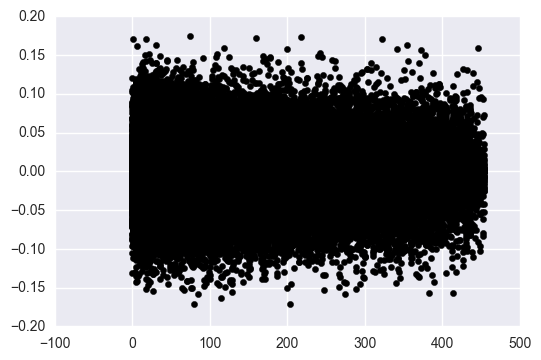

In [218]:
for pred,y_test in zip(preds,ytests):
    plt.scatter(range(len(pred)),pred-y_test,c='black')
plt.show()

In [129]:
model.feature_importances_

array([  3.02982918e-08,   3.72707209e-08,   1.24408025e-07,
         0.00000000e+00,   2.92223052e-08,   1.08421492e-07,
         1.69990352e-08,   7.61053962e-08,   4.16307068e-09,
         9.86469991e-08,   4.17614737e-08,   1.77926296e-08,
         4.33752077e-08,   1.40430395e-08,   5.75607405e-08,
         6.93955420e-08,   2.72049129e-08,   2.73765606e-07,
         1.61878197e-08,   5.97592127e-09,   0.00000000e+00,
         0.00000000e+00,   2.11678201e-08,   2.73579169e-08,
         5.92059112e-09,   6.86151456e-08,   1.03090998e-07,
         1.12636512e-08,   1.01270081e-07,   8.37247103e-08,
         1.39896103e-08,   5.40755569e-08,   4.16070614e-08,
         8.10772164e-08,   1.35848866e-08,   0.00000000e+00,
         5.17357867e-08,   9.43331275e-08,   3.99672052e-08,
         1.42296465e-07,   0.00000000e+00,   1.47533773e-08,
         3.98935068e-08,   3.81054693e-08,   1.51789188e-07,
         0.00000000e+00,   6.17111087e-08,   3.31562957e-08,
         0.00000000e+00,